# Generate BEL2ABM Figure

This notebook presents the results of the replicates of the BEL2ABM simulation of amyloid beta processing.

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import time

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
print(time.asctime())
print(sys.version)

Thu Nov 16 16:55:52 2017
3.6.3 (default, Oct  9 2017, 09:47:56) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]


In [4]:
sorla_run = pd.read_csv(
    '/Users/cthoyt/Desktop/SORLA/spartan_runs_no_replicates/with_3300SORLA_22secr/results.tsv', 
    sep='\t'
)
sorla_run

,mean_sappa_values,mean_sappad_values,sappa_sums,mean_sappb_values,mean_sappbd_values,sappb_sums
10,0.017544,0.000000,0.017544,0.005013,0.000000,0.005013
20,0.037594,0.002506,0.040100,0.002506,0.000000,0.002506
50,0.152882,0.025063,0.177945,0.010025,0.000000,0.010025
100,0.265664,0.095238,0.360902,0.010025,0.007519,0.017544
200,0.598997,0.418546,1.017544,0.070175,0.040100,0.110276
300,0.857143,0.779449,1.636591,0.105263,0.072682,0.177945
400,1.355890,1.411028,2.766917,0.137845,0.117794,0.255639
500,1.839599,2.240602,4.080201,0.223058,0.215539,0.438596
600,2.368421,3.208020,5.576441,0.238095,0.270677,0.508772


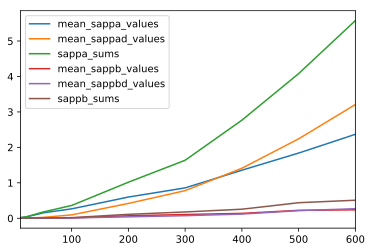

In [5]:
sorla_run.plot.line()
plt.show()

In [6]:
clean_run = pd.read_csv(
    '/Users/cthoyt/Desktop/SORLA/spartan_runs_no_replicates/wo_SORLA_22secr/results.tsv', 
    sep='\t'
)
clean_run

,mean_sappa_values,mean_sappad_values,sappa_sums,mean_sappb_values,mean_sappbd_values,sappb_sums
10,2.177945,0.140351,2.318296,0.255639,0.002506,0.258145
20,3.781955,0.533835,4.315789,0.355890,0.042607,0.398496
50,6.498747,2.516291,9.015038,0.744361,0.265664,1.010025
100,8.957393,6.894737,15.852130,1.022556,0.621554,1.644110
200,12.428571,16.586466,29.015038,1.273183,1.503759,2.776942
300,13.839599,26.303258,40.142857,1.446115,2.423559,3.869674
400,15.375940,33.568922,48.944862,1.568922,3.315789,4.884712
500,16.476190,39.591479,56.067669,1.736842,3.944862,5.681704
600,17.606516,43.786967,61.393484,1.857143,4.278195,6.135338


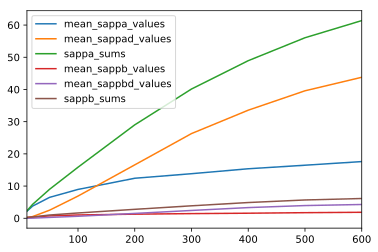

In [7]:
clean_run.plot.line()
plt.show()

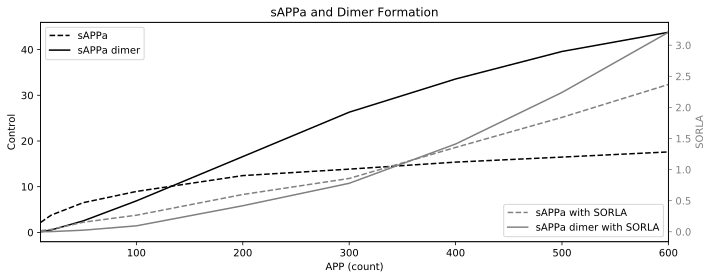

In [8]:
cols = ['mean_sappa_values', 'mean_sappad_values']
col1, col2 = cols

fix, ax1 = plt.subplots(figsize=(10,4))

clean_run[col1].plot.line(ax=ax1, color='black', linestyle='--', label='sAPPa')
clean_run[col2].plot.line(ax=ax1, color='black', label='sAPPa dimer')
ax1.set_xlabel('APP (count)')
ax1.set_ylabel('Control', color='black')
ax1.tick_params('y', colors='black')

ax1.legend()

ax2 = ax1.twinx()
sorla_run[col1].plot.line(ax=ax2, color='gray', linestyle='--', label='sAPPa with SORLA')
sorla_run[col2].plot.line(ax=ax2, color='gray', label='sAPPa dimer with SORLA')
ax2.set_ylabel('SORLA', color='gray')
ax2.tick_params('y', colors='gray')

ax2.legend(loc=4)

plt.title('sAPPa and Dimer Formation')
plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/sappa.png', dpi=300)
plt.show()

From this chart, I conclude that the sAPPa monomer levels change about the same in the context of SORLA, but the introduction of SORLA has a big effect on lessening the formation of the dimer.  

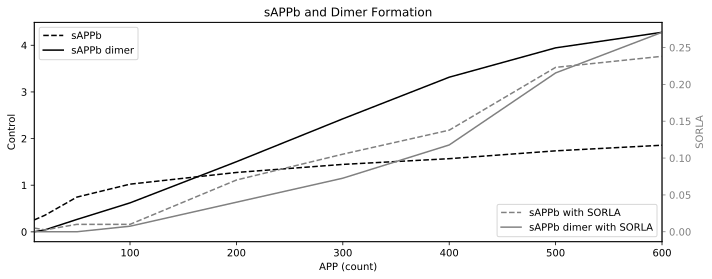

In [9]:
cols = ['mean_sappb_values', 'mean_sappbd_values']
col1, col2 = cols

fix, ax1 = plt.subplots(figsize=(10,4))

clean_run[col1].plot.line(ax=ax1, color='black', linestyle='--', label='sAPPb')
clean_run[col2].plot.line(ax=ax1, color='black', label='sAPPb dimer' )
ax1.set_xlabel('APP (count)')
ax1.set_ylabel('Control', color='black')
ax1.tick_params('y', colors='black')

ax1.legend()

ax2 = ax1.twinx()
sorla_run[col1].plot.line(ax=ax2, color='gray', linestyle='--', legend=False, label='sAPPb with SORLA')
sorla_run[col2].plot.line(ax=ax2, color='gray', legend=False, label='sAPPb dimer with SORLA')
ax2.set_ylabel('SORLA', color='gray')
ax2.tick_params('y', colors='gray')

ax2.legend(loc=4)

plt.title('sAPPb and Dimer Formation')
plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/sappb.png', dpi=300)
plt.show()

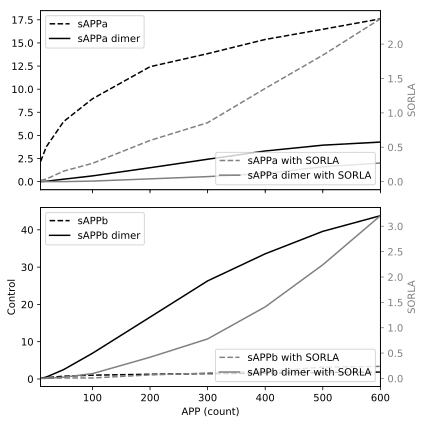

In [18]:
# Split by sAPPa vs sAPPb
#cols_f1 = ['mean_sappa_values', 'mean_sappad_values']
#cols_f2 = ['mean_sappb_values', 'mean_sappbd_values']

cols_f1 = ['mean_sappa_values', 'mean_sappbd_values']
cols_f2 = ['mean_sappb_values', 'mean_sappad_values']


col1, col2 = cols_f1
fix, ax = plt.subplots(2, figsize=(6, 6))

#ax[0].set_title('sAPPa and Dimer Formation')
clean_run[col1].plot.line(ax=ax[0], color='black', linestyle='--', label='sAPPa')
clean_run[col2].plot.line(ax=ax[0], color='black', label='sAPPa dimer')
ax1.set_xlabel('APP (count)')
ax1.set_ylabel('Control', color='black')
ax1.tick_params('y', colors='black')

ax[0].legend()

ax2 = ax[0].twinx()
sorla_run[col1].plot.line(ax=ax2, color='gray', linestyle='--', label='sAPPa with SORLA')
sorla_run[col2].plot.line(ax=ax2, color='gray', label='sAPPa dimer with SORLA')
ax2.set_ylabel('SORLA', color='gray')
ax2.tick_params('y', colors='gray')

ax2.legend(loc=4)

col1, col2 = cols_f2

#ax[1].set_title('sAPPb and Dimer Formation')
clean_run[col1].plot.line(ax=ax[1], color='black', linestyle='--', label='sAPPb')
clean_run[col2].plot.line(ax=ax[1], color='black', label='sAPPb dimer' )
ax[1].set_xlabel('APP (count)')
ax[1].set_ylabel('Control', color='black')
ax[1].tick_params('y', colors='black')

ax[1].legend()

ax2 = ax[1].twinx()
sorla_run[col1].plot.line(ax=ax2, color='gray', linestyle='--', legend=False, label='sAPPb with SORLA')
sorla_run[col2].plot.line(ax=ax2, color='gray', legend=False, label='sAPPb dimer with SORLA')
ax2.set_ylabel('SORLA', color='gray')
ax2.tick_params('y', colors='gray')

ax2.legend(loc=4)

plt.tight_layout()
plt.savefig('/Users/cthoyt/Desktop/sappb.png', dpi=300)
plt.show()